# Week Two IP: Descriptive Statistics



## 1.   Defining the question



### a) Specifying the Data Analytic Question

> We are required to figure out how we can predict which individuals are most likely to have or use a bank account whle providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.




### b) Defining the metric for success

> For this study to be considered a success we should be able to predict a target market for financial institutions and also find out which demographic factors influence the financial outcomes of individuals.


### c) Understanding the content

> Financial inclusion is defined as the availability and equality of opportunities to access financial services.It refers to a process by which individuals and businesses can access appropriate, affordable, and timely financial products and services. These include banking, loan, equity, and insurance products.Financial inclusion efforts typically target those who are unbanked and underbanked, and directs sustainable financial services to them.

>Financial inclusion is understood to go beyond merely opening a bank account. It is possible for banked individuals to be excluded from financial services.  Having more inclusive financial systems has been linked to stronger and more sustainable economic growth and development and thus achieving financial inclusion has become a priority for many countries across the globe.

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

> Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the experimental design

> The process we shall undertake throughout our research are;
> 1. Reading our data by importing the required libraries
> 2. Checking the data (Checking data types, shape, displaying data.
> 3. Checking for multicollinearity.
> 4. Data preparation (checking anormalities, outliers, missing data, data cleaning)
> 5. Exploratory data analysis and models (Univariate, Bivariate, Multivariate)
> 6. Drawing conclusions and recommendations.

### e) Data relevance

> Our dataset contains 13 columns and over 23,000 rows. It contains a label country which is the country in which the person was interviewed, the year of which the person was interviewed, uniqueid which is a unique identifier for each person taking part in the interview. Location type informs us whether the person interviewed was from urban or rural area. Cellphone access column has information whether interviewed person can access a phone or not. Household size, it entails the persons living in one house. Age of the respondent, it's the age of the interviewed person, Gender of the respondent it's whether the respondent is female or male. Education level, this is the level of education of the interviewed person. All this information is relevant to the insights we want to create. The association between one variable to the other would be very supportive to establish insights for decision making. 

## 2. Reading the Data

In [3]:
# Loading the Data from the source
# Dataset url = http://bit.ly/FinancialDataset
# importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

financial_df = pd.read_csv("http://bit.ly/FinancialDataset")
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
financial_df.shape

(23524, 13)

In [5]:
# Previewing the top of our dataset
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of our dataset
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

>There was no available data to support our dataset. The data available on the world bank data was not exhaustive to enable us carry ou the validation. The data was not adequate enough, more data is being sourced out to enable our data validation. 

## 5. Tidying the Dataset

In [8]:
# Renaming the columns
financial_df.rename({'Has a Bank account': 'bank_account', 'Type of Location': 'location', 'Cell Phone Access': 'phone_access', 'Respondent Age': 'respondent_age', 'The relathip with head': 'relationship_with_head', 'Level of Educuation': 'level_of_education', 'Type of Job': 'type_of_job'}, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


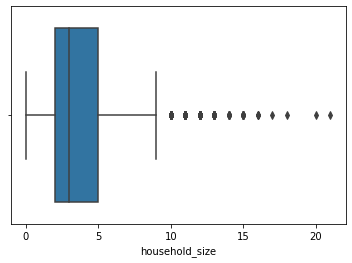

In [9]:
# Checking for Outliers
import seaborn as sns
sns.boxplot(financial_df['household_size'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


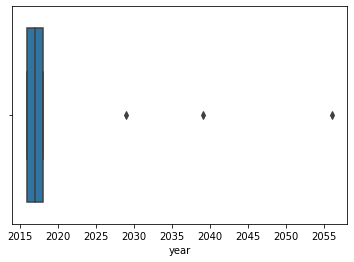

In [10]:
# ouliers
sns.boxplot(financial_df['year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


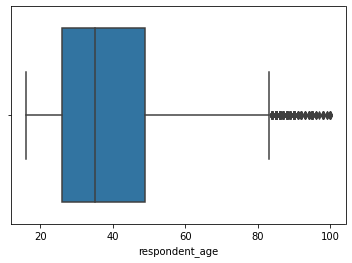

In [11]:
sns.boxplot(financial_df['respondent_age'])

In [12]:
# Checking for abnormalities
Q1 = financial_df['respondent_age'].quantile(.25)
Q3 = financial_df['respondent_age'].quantile(.75)

IQR1 = Q3 - Q1
IQR1


23.0

In [13]:
# Checking for abnormalities
Q1 = financial_df['year'].quantile(.25)
Q3 = financial_df['year'].quantile(.75)

IQR2 = Q3 - Q1
IQR2

2.0

In [14]:
# Checking for abnormalities
Q1 = financial_df['household_size'].quantile(.25)
Q3 = financial_df['household_size'].quantile(.75)

IQR1 = Q3 - Q1
IQR1

3.0

In [15]:
# Identifying the Missing Data
#
financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
bank_account              36
location                  15
phone_access              11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of_education        29
type_of_job               30
dtype: int64

In [16]:
# Dealing with the Missing Data
#
financial_df.dropna(inplace = True)

In [17]:
# More data cleaning procedures

Q1 = financial_df.quantile(0.25)
Q3 = financial_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year               2.0
household_size     3.0
respondent_age    23.0
dtype: float64


In [18]:
# Removing the outliers

finance_df_out = financial_df[~((financial_df < (Q1 - 1.5 * IQR)) |(financial_df > (Q3 + 1.5 * IQR))).any(axis=1)]
finance_df_out

,country,year,uniqueid,bank_account,location,phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


## 6. Exploratory Analysis

## Univariate Analysis

In [19]:
# Plotting the univariate summaries and recording our observations
#
finance_df_out.describe(include='all')

,country,year,uniqueid,bank_account,location,phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
count,22725,22725.000000,22725,22725,22725,22725,22725.000000,22725.000000,22725,22725,22725,22725,22725
unique,4,NaN,8645,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_98,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8512,NaN,4,19490,13810,16985,NaN,NaN,13397,12402,10431,12443,6209
mean,NaN,2016.968185,NaN,NaN,NaN,NaN,3.579846,38.347987,NaN,NaN,NaN,NaN,NaN
std,NaN,0.846366,NaN,NaN,NaN,NaN,2.080542,15.806141,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,48.000000,NaN,NaN,NaN,NaN,NaN


In [20]:
# Finding the mean in age of the respondent

finance_df_out['respondent_age'].mean()

38.34798679867987

In [21]:
# Finding the mode in age of the respondent

finance_df_out['respondent_age'].mode()

0    30.0
dtype: float64

In [22]:
# Finding the median in age of the respondent

finance_df_out['respondent_age'].median()

35.0

In [23]:
# Finding the standard deviation in age of the respondent

finance_df_out['respondent_age'].std()
# 

15.806141256107674

In [24]:
# Finding the variance in age of the respondent
finance_df_out['respondent_age'].var()

249.83410140802906

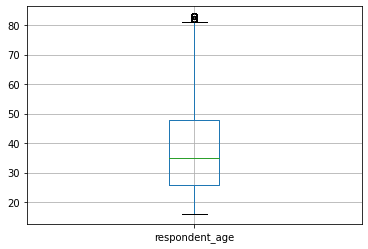

In [25]:
# Data Visualization 
# Box plot

finance_df_out.boxplot(['respondent_age'])

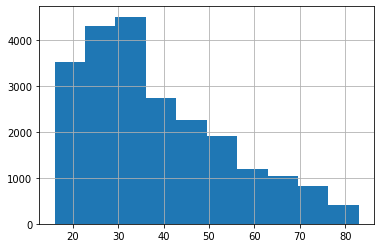

In [26]:
# Histogram
finance_df_out['respondent_age'].hist()

> From our exploratory analysis, we have a mean of age at 38, mode at 30 and median age at 35. Since we have mean age greater than median. Our age is positively skewed. Variance is 249 and a standard deviation of 15. This means we have a variation from the mean of 15 which is high.

## Bivariate Analysis

In [27]:
# finding the correlation between age and household size

finance_df_out['respondent_age'].corr(finance_df_out['household_size'])

# there is a very weak negative correlation between the respondent age and the household size 
# we can say absolutely there is no relative relationship between age and household size.
# these means that an increase in respondent age, leads to decrease in household size.

-0.1062088216975987

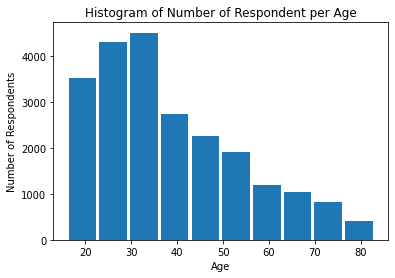

In [28]:
# Histogram to show number of repondents per ager
age = finance_df_out['respondent_age']

plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Number of Respondent per Age')
plt.show()

> From the frequency table we find that most of our respondents fall between the age of 30-35. There is a significant increase from the age of 15 - 35 who fall under youth category. There is a decrease in respondents between the age of 35 - 85.

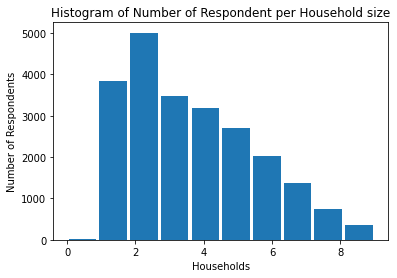

In [29]:
# Histogram to show number of repondents per age
household = finance_df_out['household_size']

plt.hist(household, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Households')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Number of Respondent per Household size')
plt.show()

> Based on our respondents most of the households are between 1 - 5 in number with majority at 3 in number.

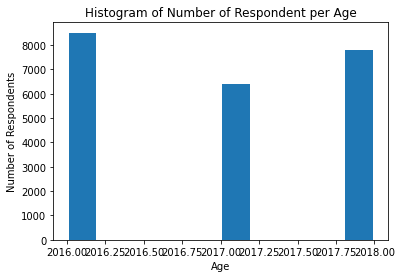

In [30]:
# Histogram to show number of repondents per Year
years = finance_df_out['year']

plt.hist(years, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Number of Respondent per Age')
plt.show()

> Our survey was carried out in 2017.

In [31]:
# correlation between year and household size

finance_df_out['year'].corr(finance_df_out['household_size'])

# the is no correlation between year and number of household size.

-0.09668379009974627

> There is no correlation between year and number of household size. Although it indicates an year leads to a decrease in household size.

In [32]:
# checking for any association between year and respondent age 

finance_df_out['year'].corr(finance_df_out['respondent_age'])

# there is absorlutely no correlation between year and respondent age.


-0.02353778077729098

There is absolutely no correlation between year and respondent age. But it indicates a possibility that as years goes by there is a decrease in age of our respondents

## Multivariate analysis (Linear Discriminant Analysis)

> We are required to figure out how we can predict which individuals are most likely to have or use a bank account by providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In [33]:
finance_df_out.head()

,country,year,uniqueid,bank_account,location,phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [34]:
# Divide dataset into features and corresponding labels and then divide the resultant dataset into training and test sets.
# The code assigns the columns 7 and 8 of the dataset i.e. the feature set to X variable 
# while the values in the second column (labels) are assigned to the y variable.
X = finance_df_out.iloc[:, 7:8].values
y = finance_df_out.iloc[:, 1].values

In [35]:
# we then divides data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
# We now need to perform feature scaling. We execute the following code to do so:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# we peforming LDA with Scikit-Learn. 
# we import LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [38]:
# we use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [39]:
# we evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

#  We can see that with one linear discriminant, the algorithm achieved an accuracy of 38.5%.
# This is not a good model for making prediction.

[[1439    0  282]
 [1032    0  241]
 [1242    0  309]]
Accuracy0.3845984598459846


### Conclusion
> It's not recommendable to make our prediction based on our finding. A 38.5% of accuracy cannot be used to predict individuals most likely to have or use a bank account.

## 8. Challenging the solution

>  We challenge our solution by trying to perform other analysis to make a prediction.

In [40]:
finance_df_out.head()

,country,year,uniqueid,bank_account,location,phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [41]:
# finding the value of kurtosis

finance_df_out.kurt()

year             -1.601466
household_size   -0.505578
respondent_age   -0.237494
dtype: float64

In [42]:
# finding the value of skewness

finance_df_out.skew()

year              0.060351
household_size    0.605875
respondent_age    0.740214
dtype: float64

### Recomendation
> We recommend better models to be used to approach this data in order to get better insight for use in prediction. We also recommend that the survey be conducted annually in order to have enough and up to date data for better predictions.

## 9. Follow up questions

### a). Did we have the right data?

> We did not have the right data for our exhaustive analysis, most of the data is in form of object data type. Most of our analysis work well in integer and float data type. Also most of our data is not current and up to date.

### b). Do we need other data to answer our question?

> Yes, we therefore need other datasets to answer our questions to the best of our ability. The dataset should be more of integer and float to perform more analysis and visualization.

### c). Did we have the right question?

> Yes, we had the right question but inadequate data to answer it.